# Autocorrelation
Changing one signal, changes the other signal as well. 

In general, correalation between value means that if you know the value of one, you have information about the other. This information may not necessarily reflect causation.

**Pearson-Product Moment Correlation** denoted by $\rho$ qantifies correlation. For two variables $x$ and $y$ that contains $N$ values, $\rho$ is given by:

$$\rho = \frac{\sum_i (x_i-\mu_x)(y_i-\mu_y)}{N\sigma_x \sigma_y}$$

$\mu_x$ and $\mu_y$ are the means of $x$ and $y$ and $\sigma_x$ and $\sigma_y$ are their standard deviations. The value of $\rho$ is always between -1 and 1 (including both). If $\rho$ is positive, we say that the correlation is positive, which means that when one variable is high, the other the other tends to be high. If $\rho$ is negative, we say that the correlation is negative, which means that when one variable is high, the other the other tends to be low. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Audio

Numpy provides ```np.corrcoef``` that takes any number of variable and computes correlation matrix

In [2]:
def generateSignal(t,sr,f, phi):
    t = np.linspace(0,t,sr*t)
    return t,np.sin(2*np.pi*f*t+phi);

In [3]:
t1, s1 = generateSignal(1, 10000, 440, 0)
t2, s2 = generateSignal(1, 10000, 440, 1)

Text(0, 0.5, 'Amplitude')

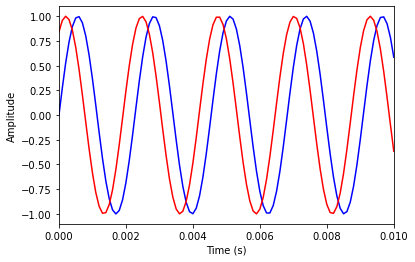

In [4]:
plt.plot(t1,s1, 'b')
plt.plot(t2,s2, 'r')
plt.xlim(0,0.010)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [5]:
corr_matrix = np.corrcoef(s1, s2, ddof=0)
# ddof means that the denominator is N and not N-1
print(corr_matrix)

[[1.         0.54026405]
 [0.54026405 1.        ]]


/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/1008316196.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr_matrix = np.corrcoef(s1, s2, ddof=0)


As the phase offset increases, this correlation decreases until the waves are 180degrees out of phase, which yields correlation -1.

## Serial Correlation
Serial correlation means the correlation of the signal with itself. We compare a signal with its delayed or shifted version. This concept is another fundamental bulding block in understanding critical concepts like Frequency Analysis of the signal.

In [6]:
def serial_corr(signal, lag=1):
    n = len(signal)
    y1 = signal[lag:]
    y2 = signal[:n-lag] # Original Signal. Length reduced to match the length of the delayed signal
    corr = np.corrcoef(y1, y2, ddof=0)[0, 1]
    return corr

In [7]:
serial_corr(s1, lag=1)

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


0.9620201244302945

## Correlation of Gaussian Noise signal with itself

(0.0, 0.1)

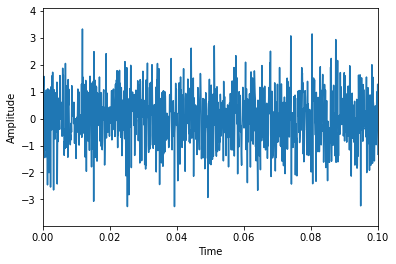

In [10]:
duration = 0.5
framerate = 11025
ts = np.linspace(0,duration,int(framerate*duration))
ys = np.random.normal(loc=0.0, scale=1.0, size=len(ts))
plt.plot(ts, ys)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim(0,0.1)

In [13]:
serial_corr(ys, lag=1)

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


-0.013092435749163717

As we can see, that the correlation is very weak, because the noise by defination is uncorrelated.

## Correlation of Brownian Noise signal with itself

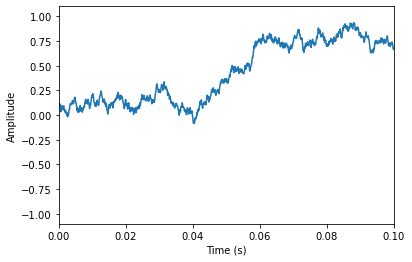

In [14]:
def unbias(y):
    '''
    standardise the value in array y so that its mean is 0 and std = 1
    '''
    y_mean = np.mean(y)
    y = (np.array([i-y_mean for i in y]))/np.std(y)
    return y

def normalise(y, a, b):
    '''
    normalise y between the range a and b
    '''
    y = ( (y-np.min(y))/(np.max(y)-np.min(y))) * (b-a)
    y = y + a
    return y

duration = 0.5
framerate = 11025
amplitude = 1
ts = np.linspace(0,duration,int(framerate*duration))
dys = np.random.uniform(-amplitude, amplitude, len(ts))
ys = np.cumsum(dys)
ys = normalise(unbias(ys), -amplitude, amplitude)
plt.plot(ts, ys)
plt.xlim(0,0.10)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude');

In [15]:
serial_corr(ys, lag=1)

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


0.9987731577047375

As expected, the correlation is very strong, because the noise generated by Brownian noise by defination is correlated

## Autocorrelation
Finding serial correlation with different lags is autocorrelation.

In [16]:
def autocorr(signal):
    lags = range(len(signal)//2)
    corrs = [serial_corr(signal, lag) for lag in lags]
    return lags, corrs

## Autocorrelation of periodic function


In [19]:
import librosa
import librosa.display

In [37]:
# load the audio file
y, sr = librosa.load("data/code_28042__bcjordan__voicedownbew.wav", sr=44100)
print(sr)

44100


(0.0, 4000.0)

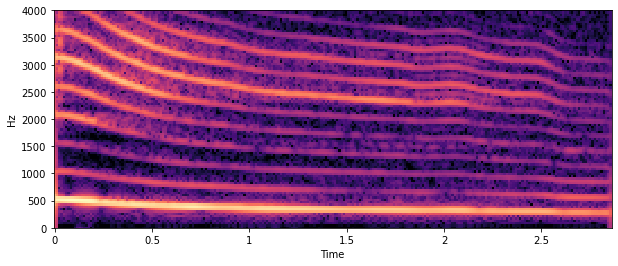

In [49]:
# code to plot spectrogram
# we havent studied fourier transform yet, so we will skip the details of fourier transform in this code for now

fig, ax = plt.subplots(1,1,figsize=(10,4))
n_fft = 1024 # how many frequency points are there? the highest value of this is sr.
hop_length = n_fft//4 #the default value in librosa 
S = np.abs(librosa.stft(y,hop_length=hop_length,n_fft=n_fft))
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='linear', ax = ax, x_axis='time', sr=sr)
ax.set_ylim(0,4000)

The fundamental frequency and some of the harmonics show up clearly. The chirp starts near 500 Hz and
drops down to about 300 Hz

Now, lets us take a small duration of this audio file and plot its spectrum.

In [50]:
duration = 0.01
startTime = 0.2
y_short_segment = y[int(sr*startTime):(int(sr*startTime)+int(sr*duration))]

In [51]:
# plot the spectrum (Function taken from chapter 3)
def spectrum(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    A = np.abs(A)
    return F[0:sr//2], A[0:sr//2]

(0.0, 1000.0)

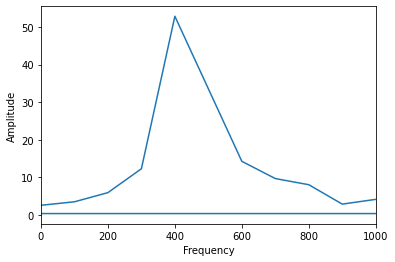

In [52]:
F, A = spectrum(y_short_segment, sr)
plt.plot(F,A)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0,1000)

In [53]:
print("Length of selected audio segment = {}".format(len(y_short_segment)))

Length of selected audio segment = 441


There is a clear peak near 400 Hz, but it is hard to identify the pitch precisely. The length of the segment is 441 samples at a framerate of 44100 Hz, so the frequency resolution is 100 Hz. That means the estimated pitch might be oﬀ by 50 Hz. **Taking a longer segment might solve the problem, but even the frequency is changing over time, so longer segments might have different frequencies incorporated into it**

We can estimate pitch more precisely using autocorrelation. If a signal is periodic, we expect the autocorrelation to spike when the lag equals the period. Lets start by plotting two segments from the same recording. 

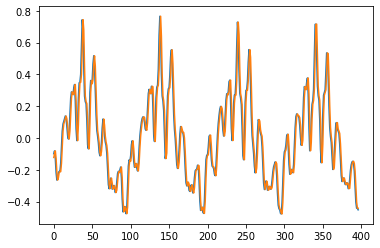

In [96]:
start = 0.2
duration = 0.01
offset = 0.001


segment1 = y[int(sr*start):(int(sr*start)+int(sr*duration))]
segment2 = y[int(sr*(start-offset)):(int(sr*(start-offset))+int(sr*duration))]

#sift segment to match length 
segment1 = segment1[:(int(duration*sr)-int(offset*sr))]
segment2 = segment2[int(offset*sr):]
#plt.plot([(i/sr)+start for i in range(int(duration*sr))], segment1)
#plt.plot([(i/sr)+(start-offset) for i in range(int(duration*sr))], segment2)
plt.plot(segment1)
plt.plot(segment2)

One segment starts at 0.2 seconds; the other starts 0.0023 seconds later. Lets find out the autocorrelation between these two segments.

In [98]:
corr_matrix = np.corrcoef(segment1, segment2, ddof=0)
corr_matrix

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/1104025194.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr_matrix = np.corrcoef(segment1, segment2, ddof=0)


array([[1.        , 0.95188369],
       [0.95188369, 1.        ]])

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


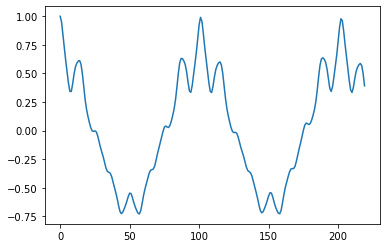

In [102]:
lags, corrs = autocorr(y_short_segment)
plt.plot(lags, corrs)


The figure above shows the autocorrelation function for the segment starting at t = 0.2 seconds. The ﬁrst peak occurs at lag=101. We can compute the frequency that corresponds to that period like this:

In [103]:
lag = 101
period = lag/sr
frequency = 1/period
print(frequency)

436.63366336633663


The estimated fundamental frequency is 437 Hz.

**Important Observation: Using Numpy fft may not always be the best method to find the fundamental frequency. Especially, in case where you have a very high sampling rate but the segment in which you are interested in finding the frequency is relatively very small. In other words, if the frequency resolution is poor, the fundamental frquency can be off. In those cases, autocorrelation is a better way of finding the frequency.**

In our case, the frequency precision usingautocorrelation is less than 10 Hz (we can check this by checking for lag 101 and 102 and 100), compared with 100 Hz using the spectrum.

## Autocorrelation of periodic function

The formula
$$\rho = \frac{\sum_i (x_i-\mu_x)(y_i-\mu_y)}{N\sigma_x \sigma_y}$$
boils down to 
$$\rho = \frac{1}{N}\sum_i x_iy_i$$
for unbiased signal where mean is 0 and standard deviation is one. Simplying further, we get
$$r = \sum_i x_iy_i$$
This deﬁnition of correlation is not "standardized", so it doesn’t generally fallbetween -1 and 1. But it has other useful properties. If you think of $x$ and $y$ as vectors, you might recognize this formula as the dot product, $x \cdot y$

## Comparison With Numy Correlate

In [110]:
np.correlate?

Signal Length = 441


/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


Text(0, 0.5, 'Correlation')

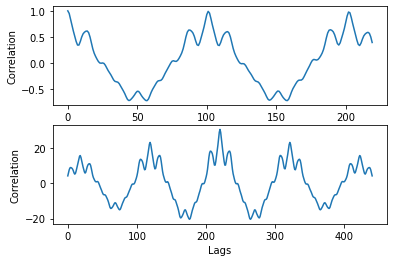

In [113]:
print("Signal Length = {}".format(len(y_short_segment)))
# our implementation
fig, ax = plt.subplots(2,1)
lags, corrs = autocorr(y_short_segment)
ax[0].plot(lags, corrs)
ax[0].set_ylabel("Correlation")


# Numpy implementation
corrs2 = np.correlate(y_short_segment, y_short_segment, mode='same')
ax[1].plot(corrs2)
ax[1].set_xlabel("Lags")
ax[1].set_ylabel("Correlation")

We observe difference in the range of x axis and y axis. Our method of autocorrelation is standardised. While our method considers the lag from 0 to $N$, the Numpy method considers the lag from $\frac{-N}{2}$ to $\frac{N}{2}$. Thus the second figure i.e. the Numpy one looks symmetric, a negative lag on one has the same eﬀect as a positive lag on the other. To compare with the results from autocorr, we can select the second half:


In [114]:
N = len(corrs2)
half = corrs2[N//2:]

half /= half[0] #standardize the results so the correlation with lag=0 is 1.

/var/folders/_3/x_hy8vf90v93s9rdb_r5pj140000gn/T/ipykernel_14750/2936995608.py:5: DeprecationWarning: bias and ddof have no effect and are deprecated
  corr = np.corrcoef(y1, y2, ddof=0)[0, 1]


Text(0, 0.5, 'Correlation')

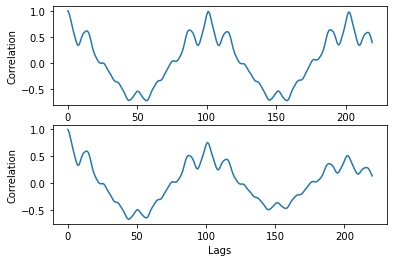

In [116]:
# lets plot again
fig, ax = plt.subplots(2,1)
lags, corrs = autocorr(y_short_segment)
ax[0].plot(lags, corrs)
ax[0].set_ylabel("Correlation")


# Numpy implementation

ax[1].plot(half)
ax[1].set_xlabel("Lags")
ax[1].set_ylabel("Correlation")

Now the plots are very similar. **Now you know what autocorrelation is, how to use it to
estimate the fundamental period of a signal, and two ways to compute it**